MODELO PARA DETERMINAR EL PRECIO DE UNA NOTA DE CRÉDITO

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mstats

In [102]:
df = pd.read_excel(r"C:\Users\User\Documents\Precio_VN_NC.xlsx")

df.head()

,Precio,Valor_Nominal
0,95.0,60.49
1,98.0,97.02
2,95.0,114.92
3,96.0,141.14
4,97.0,160.40


Pre-Procesamiento de los datos

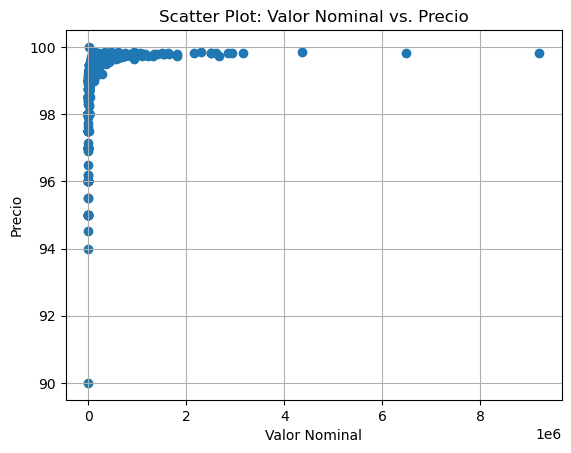

In [66]:
#detectar si tiene outliers

import matplotlib.pyplot as plt

plt.scatter(df['Valor_Nominal'], df['Precio'])
plt.xlabel('Valor Nominal')
plt.ylabel('Precio')
plt.title('Scatter Plot: Valor Nominal vs. Precio')
plt.grid(True)  # Add grid lines for better readability (optional)
plt.show()

In [103]:
import scipy.stats as stats

# Assuming your data is loaded into a pandas DataFrame named 'df'

# Calculate z-scores for 'Valor_Nominal'
def calculate_z_scores(data):
  """
  Calculates z-scores for a given data array.

  Args:
      data: A NumPy array of data points.

  Returns:
      A NumPy array containing the z-scores for each data point.
  """
  mean = np.mean(data)
  std = np.std(data)
  z_scores = (data - mean) / std
  return z_scores

z_scores_nominal = calculate_z_scores(df['Valor_Nominal'])

# Identify outliers based on z-score threshold (e.g., 3)
threshold = 3
outliers_zscore = df[np.abs(z_scores_nominal) > threshold]['Valor_Nominal']
print("Outliers based on z-score (absolute value > ", threshold, "):", outliers_zscore.to_numpy())  # Convert Series to NumPy array for printing

# Calculate IQR for 'Valor_Nominal'
q1_nominal = np.percentile(df['Valor_Nominal'], 25)
q3_nominal = np.percentile(df['Valor_Nominal'], 75)
iqr_nominal = q3_nominal - q1_nominal

# Calculate lower and upper bounds for IQR outlier detection
lower_bound = q1_nominal - 1.5 * iqr_nominal
upper_bound = q3_nominal + 1.5 * iqr_nominal

# Identify outliers based on IQR
outliers_iqr = df[(df['Valor_Nominal'] < lower_bound) | (df['Valor_Nominal'] > upper_bound)]['Valor_Nominal']
print("Outliers based on IQR (outside Q1-1.5IQR or Q3+1.5IQR):", outliers_iqr.to_numpy())

Outliers based on z-score (absolute value >  3 ): [1006849.73 1011014.02 1012241.8  1053998.75 1093319.83 1099228.84
 1120222.6  1150000.   1217987.68 1313240.81 1342435.28 1392813.23
 1500000.   1515305.03 1548605.78 1615164.42 1640951.25 1800000.
 1817752.18 2150312.49 2305963.   2500000.   2500000.   2601488.47
 2667148.18 2849362.96 2933448.12 3151937.62 4370035.88 6478677.33
 9208468.  ]
Outliers based on IQR (outside Q1-1.5IQR or Q3+1.5IQR): [  84769.81   85066.74   85195.29   85418.02   85611.1    85742.76
   85817.66   86131.19   86736.83   86988.65   87200.37   87357.66
   87470.48   88748.34   88883.54   89949.4    90000.     90370.44
   90768.3    90960.51   91000.     91272.24   91403.95   91676.37
   91746.07   91841.88   91858.28   92760.     92760.     93197.93
   93293.73   94323.19   94594.21   95000.     95272.88   95515.08
   95952.54   96547.     96676.04   96730.12   97128.1    97792.37
   98030.88   99289.63   99324.58  100000.    100000.    100000.
  100000.    1

In [87]:
#Handling Outliers
df['Valor_Nominal'] = mstats.winsorize(df['Valor_Nominal'], limits=[0.05, 0.05])

# Feature Scaling
scaler = MinMaxScaler()
df['Valor_Nominal'] = scaler.fit_transform(df[['Valor_Nominal']])

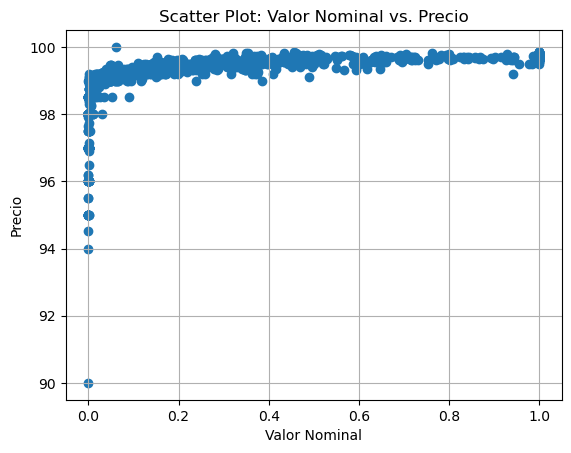

In [75]:
plt.scatter(df['Valor_Nominal'], df['Precio'])
plt.xlabel('Valor Nominal')
plt.ylabel('Precio')
plt.title('Scatter Plot: Valor Nominal vs. Precio')
plt.grid(True)  # Add grid lines for better readability (optional)
plt.show()

In [ ]:
Regresión Lineal

In [88]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress  

X = df[['Valor_Nominal']]  
Y = df['Precio']

# KFold para Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas vacías para guardar las métricas de evaluación de cada fold
mse_scores = []
r2_scores = []
p_values = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Entrenar el Modelo de Regresión Lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Hacer predicciones en el test set para este fold
    y_predicted = model.predict(X_test)

    # Calcular las métricas de evaluación
    mse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    slope, intercept, r_value, p_value, std_err = linregress(X_test.values.ravel(), y_test)  

    # Guardar las métricas de evaluación
    mse_scores.append(mse)
    r2_scores.append(r2)
    p_values.append(p_value)

# Print average scores across all folds
print("Average Mean Squared Error:", np.mean(mse_scores))
print("Average R-squared:", np.mean(r2_scores))
print("Average P-value:", np.mean(p_values))


Average Mean Squared Error: 0.33814570362114516
Average R-squared: 0.22385932957158614
Average P-value: 2.2602754433126444e-28


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
final_model = LinearRegression()
final_model.fit(X_train, y_train)
y_predicted_final = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_predicted_final)
final_r2 = r2_score(y_test, y_predicted_final)
_, _, _, final_p_value, _ = linregress(X_test.values.ravel(), y_test)
print("Mean Squared Error on final test set:", final_mse)
print("R-squared on final test set:", final_r2)
print("P-value on final test set:", final_p_value)

Mean Squared Error on final test set: 0.22854746406775495
R-squared on final test set: 0.29383107610370907
P-value on final test set: 6.690030716482308e-45


Predicciones

In [90]:
new_data = [[1000000]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = final_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [103.06111734]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [91]:
new_data = [[100000]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = final_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [99.23784701]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [92]:
new_data = [[10000]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = final_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [98.85551997]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [93]:
new_data = [[1000]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = final_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [98.81728727]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Pre-Procesamiento de los daatos 2

In [94]:
df = pd.read_excel(r"C:\Users\User\Documents\Precio_VN_NC.xlsx")

df.head()

,Precio,Valor_Nominal
0,95.0,60.49
1,98.0,97.02
2,95.0,114.92
3,96.0,141.14
4,97.0,160.40


In [95]:
scaler = MinMaxScaler()
df['Valor_Nominal'] = scaler.fit_transform(df[['Valor_Nominal']])

Regresión lineal 2

In [96]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress  

X = df[['Valor_Nominal']]  
Y = df['Precio']

# KFold para Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas vacías para guardar las métricas de evaluación de cada fold
mse_scores = []
r2_scores = []
p_values = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Entrenar el Modelo de Regresión Lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Hacer predicciones en el test set para este fold
    y_predicted = model.predict(X_test)

    # Calcular las métricas de evaluación
    mse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    slope, intercept, r_value, p_value, std_err = linregress(X_test.values.ravel(), y_test)  

    # Guardar las métricas de evaluación
    mse_scores.append(mse)
    r2_scores.append(r2)
    p_values.append(p_value)

# Print average scores across all folds
print("Average Mean Squared Error:", np.mean(mse_scores))
print("Average R-squared:", np.mean(r2_scores))
print("Average P-value:", np.mean(p_values))

Average Mean Squared Error: 0.41731947309246487
Average R-squared: 0.036347211751598205
Average P-value: 4.867560227155702e-05


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
final_model = LinearRegression()
final_model.fit(X_train, y_train)
y_predicted_final = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_predicted_final)
final_r2 = r2_score(y_test, y_predicted_final)
_, _, _, final_p_value, _ = linregress(X_test.values.ravel(), y_test)
print("Mean Squared Error on final test set:", final_mse)
print("R-squared on final test set:", final_r2)
print("P-value on final test set:", final_p_value)

Mean Squared Error on final test set: 0.3009705381181918
R-squared on final test set: 0.07005732094055139
P-value on final test set: 3.277231916170298e-14


Predicciones

In [98]:
new_data = [[1000000]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = final_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [99.40396013]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [99]:
new_data = [[100000]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = final_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [98.99552105]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [100]:
new_data = [[10000]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = final_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [98.95467714]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [101]:
new_data = [[10000]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = final_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [98.95467714]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Regresión 3

In [76]:
df = pd.read_excel(r"C:\Users\User\Documents\Precio_VN_NC.xlsx")

df.head()

,Precio,Valor_Nominal
0,95.0,60.49
1,98.0,97.02
2,95.0,114.92
3,96.0,141.14
4,97.0,160.40


In [77]:
from sklearn.preprocessing import StandardScaler

# Logarithmic transformation for 'Valor_Nominal'
df['Log_Valor_Nominal'] = np.log(df['Valor_Nominal'])

# Standardize both features
scaler = StandardScaler()
df['Log_Valor_Nominal'] = scaler.fit_transform(df[['Log_Valor_Nominal']])

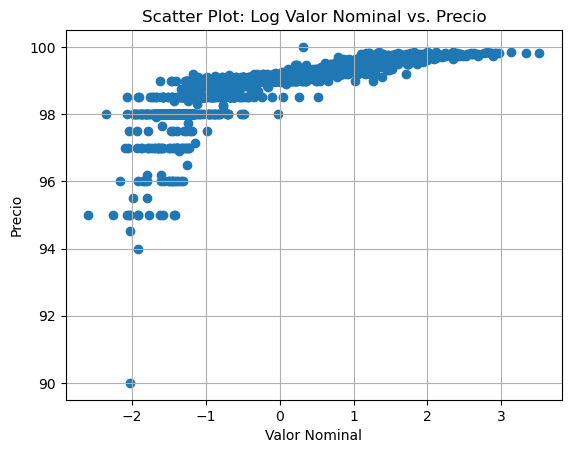

In [78]:
import matplotlib.pyplot as plt

plt.scatter(df['Log_Valor_Nominal'], df['Precio'])
plt.xlabel('Valor Nominal')
plt.ylabel('Precio')
plt.title('Scatter Plot: Log Valor Nominal vs. Precio')
plt.grid(True)  # Add grid lines for better readability (optional)
plt.show()

In [79]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress  

X = df[['Log_Valor_Nominal']]  
Y = df['Precio']

# KFold para Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas vacías para guardar las métricas de evaluación de cada fold
mse_scores = []
r2_scores = []
p_values = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Entrenar el Modelo de Regresión Lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Hacer predicciones en el test set para este fold
    y_predicted = model.predict(X_test)

    # Calcular las métricas de evaluación
    mse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    slope, intercept, r_value, p_value, std_err = linregress(X_test.values.ravel(), y_test)  

    # Guardar las métricas de evaluación
    mse_scores.append(mse)
    r2_scores.append(r2)
    p_values.append(p_value)

# Print average scores across all folds
print("Average Mean Squared Error:", np.mean(mse_scores))
print("Average R-squared:", np.mean(r2_scores))
print("Average P-value:", np.mean(p_values))

Average Mean Squared Error: 0.19579801150713438
Average R-squared: 0.5511300369286488
Average P-value: 7.267581997480257e-86


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
final_model = LinearRegression()
final_model.fit(X_train, y_train)
y_predicted_final = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_predicted_final)
final_r2 = r2_score(y_test, y_predicted_final)
_, _, _, final_p_value, _ = linregress(X_test.values.ravel(), y_test)
print("Mean Squared Error on final test set:", final_mse)
print("R-squared on final test set:", final_r2)
print("P-value on final test set:", final_p_value)

Mean Squared Error on final test set: 0.122649998769133
R-squared on final test set: 0.6210344402640002
P-value on final test set: 2.2456600516742615e-123


In [82]:
new_value = [[1000000]]
new_data = np.log(new_value)


# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = final_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [100.18114354]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [83]:
new_value = [[100000]]
new_data = np.log(new_value)


# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = final_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [99.59148111]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [84]:
new_value = [[10000]]
new_data = np.log(new_value)


# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = final_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [99.00181867]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [85]:
new_value = [[1000]]
new_data = np.log(new_value)


# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = final_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [98.41215624]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Regresión 4

In [104]:
df = pd.read_excel(r"C:\Users\User\Documents\Precio_VN_NC.xlsx")

df.head()

,Precio,Valor_Nominal
0,95.0,60.49
1,98.0,97.02
2,95.0,114.92
3,96.0,141.14
4,97.0,160.40


In [105]:
df['Log_Valor_Nominal'] = np.log(df['Valor_Nominal'])

# Standardize both features
scaler = MinMaxScaler()
df['Log_Valor_Nominal'] = scaler.fit_transform(df[['Log_Valor_Nominal']])

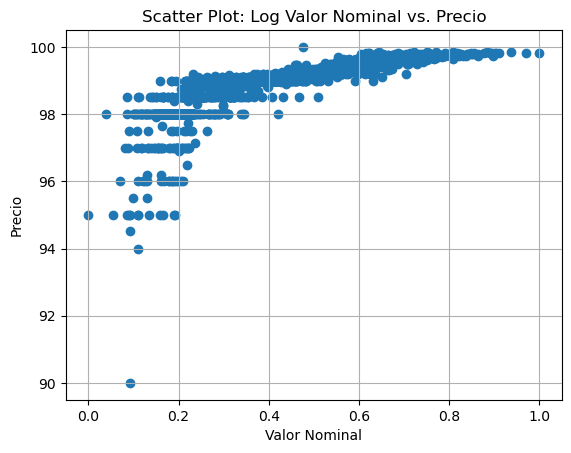

In [106]:
import matplotlib.pyplot as plt

plt.scatter(df['Log_Valor_Nominal'], df['Precio'])
plt.xlabel('Valor Nominal')
plt.ylabel('Precio')
plt.title('Scatter Plot: Log Valor Nominal vs. Precio')
plt.grid(True)  # Add grid lines for better readability (optional)
plt.show()

In [107]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress  

X = df[['Log_Valor_Nominal']]  
Y = df['Precio']

# KFold para Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas vacías para guardar las métricas de evaluación de cada fold
mse_scores = []
r2_scores = []
p_values = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Entrenar el Modelo de Regresión Lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Hacer predicciones en el test set para este fold
    y_predicted = model.predict(X_test)

    # Calcular las métricas de evaluación
    mse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    slope, intercept, r_value, p_value, std_err = linregress(X_test.values.ravel(), y_test)  

    # Guardar las métricas de evaluación
    mse_scores.append(mse)
    r2_scores.append(r2)
    p_values.append(p_value)

# Print average scores across all folds
print("Average Mean Squared Error:", np.mean(mse_scores))
print("Average R-squared:", np.mean(r2_scores))
print("Average P-value:", np.mean(p_values))

Average Mean Squared Error: 0.1957980115071343
Average R-squared: 0.5511300369286488
Average P-value: 7.267581997479429e-86


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
final_model = LinearRegression()
final_model.fit(X_train, y_train)
y_predicted_final = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_predicted_final)
final_r2 = r2_score(y_test, y_predicted_final)
_, _, _, final_p_value, _ = linregress(X_test.values.ravel(), y_test)
print("Mean Squared Error on final test set:", final_mse)
print("R-squared on final test set:", final_r2)
print("P-value on final test set:", final_p_value)

Mean Squared Error on final test set: 0.12264999876913343
R-squared on final test set: 0.6210344402639989
P-value on final test set: 2.245660051676178e-123


K nearest neighbor

In [137]:
df = pd.read_excel(r"C:\Users\User\Documents\Precio_VN_NC.xlsx")

df.head()

,Precio,Valor_Nominal
0,95.0,60.49
1,98.0,97.02
2,95.0,114.92
3,96.0,141.14
4,97.0,160.40


In [138]:
df['Valor_Nominal'] = mstats.winsorize(df['Valor_Nominal'], limits=[0.05, 0.05])

# Feature Scaling
scaler = MinMaxScaler()
df['Valor_Nominal'] = scaler.fit_transform(df[['Valor_Nominal']])

In [144]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor

# Assuming your data is loaded into DataFrames 'X' (features) and 'y' (target)
X = df[['Valor_Nominal']]  # Load your feature data
y = df['Precio'] # Load your target data

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': range(145, 180),  # Adjust range as needed (odd numbers for KNN)
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Different distance metrics
}

# Define the KNN model
knn = KNeighborsRegressor()

# Set up Repeated Stratified K-Fold cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# Define the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')  # Minimize mean squared error

# Train the model with grid search
grid_search.fit(X, y)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters and potentially evaluate the model on unseen data

print("Best KNN parameters:", best_params)
# Use the best_model for prediction on new data

Best KNN parameters: {'metric': 'minkowski', 'n_neighbors': 151}


In [145]:
new_data = [[1000000]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = best_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [99.72325033]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [146]:
new_data = [[100000]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = best_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [99.53936556]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [148]:
new_data = [[10000]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = best_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [99.06801457]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [149]:
new_data = [[1000]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = best_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [98.44328543]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [150]:
new_data = [[60]]

# Apply the same scaling transformation as used during training
scaled_new_data = scaler.transform(new_data)

# Make prediction using the model (assuming 'final_model' is your trained model)
predicted_price = best_model.predict(scaled_new_data)

print("Predicted price for the new data point:", predicted_price)

Predicted price for the new data point: [97.44039735]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
